# Assignment 4.1

Name: BHAVIN BHARATBHAI PALAN  
Date: 06/01/2025

For this assignment, you will refer to the textbook to solve the practice exercises. **Use Python to answer any coding problems (not R, even if indicated in your textbook).** Use Jupyter Notebook, Google Colab, or a similar software program to complete your assignment. Submit your answers as a **PDF or HTML** file. As a best practice, always label your axes and provide titles for any graphs generated on this assignment. Round all quantitative answers to 2 decimal places.

## Problem # 4.1.

For a point estimate of the mean of a population that is assumed to have a normal distribution,
a data scientist decides to use the average of the sample lower and upper quartiles for the $n = 100$
observations, since unlike the sample mean $\bar{Y}$, the quartiles are not affected by outliers. Evaluate
the precision of this estimator compared to $\bar{Y}$ by randomly generating 100,000 samples of size
100 each from a $N(0, 1)$ distribution and comparing the standard deviation of the 100,000
estimates with the theoretical standard error of $\bar{Y}$.

**Answer:**

- Approach is to generate a 100,000 samples with 100 observations with value between 0 & 1, find the mean of it along with Average using Q1 = 25 % and Q3 = 75%.
-  

In [4]:
import numpy as np

np.random.seed(0)

n = 100
samplecount = 100_000

mean_list = np.zeros(samplecount)
quartile_avg_list = np.zeros(samplecount)

for i in range(samplecount):
    sampleValues = np.random.normal(0, 1, n)
    mean_list[i] = np.mean(sampleValues)
    q1 = np.percentile(sampleValues, 25)
    q3 = np.percentile(sampleValues, 75)
    quartile_avg_list[i] = (q1 + q3) / 2

## Calculate standard deviations of estimators
stdMean = np.std(mean_list)
stdQuartAvg = np.std(quartile_avg_list)

print(f"1. Standard Deviation of sample mean: {stdMean:.5f}")
print(f"2. Standard Deviation of Average of Quartile: {stdQuartAvg:.5f}")
print(f"3. Theoretical Standard Error of sample mean: {1/np.sqrt(n):.5f}")


1. Standard Deviation of sample mean: 0.10010
2. Standard Deviation of Average of Quartile: 0.11049
3. Theoretical Standard Error of sample mean: 0.10000


## Problem # 4.2.

For a sequence of observations of a binary random variable, you observe the geometric random
variable (Section 2.2.2) outcome of the first success on observation number $y = 3$. Find and plot
the likelihood function.

**Answer:**

Geometric Random Variable describes the number of trials before the first success.

for given y = 3, 
- Likelihood Function f(2) = (1 - p)**2 * p
- p or theta value should be between 0 & 1 so 0.01 and 0.99
- We will take 1000 points in linespace



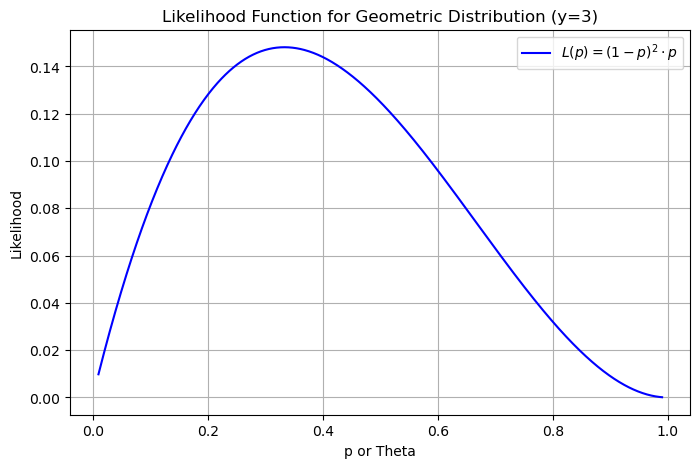

In [11]:
import numpy as np
import matplotlib.pyplot as plt

## Define the likelihood function
def fun_likelihood(p):
    return (1 - p)**2 * p

## Generate theta values between 0.01 and 0.99
theta_vals = np.linspace(0.01, 0.99, 1000)
likelihood_vals = fun_likelihood(theta_vals)

## Plot the Visual
plt.figure(figsize=(8, 5))
plt.plot(p_vals, likelihood_vals, label=r'$L(p) = (1 - p)^2 \cdot p$', color='blue')
plt.xlabel('p or Theta')
plt.ylabel('Likelihood')
plt.title('Likelihood Function for Geometric Distribution (y=3)')
plt.grid(True)
plt.legend()
plt.show()


## Problem # 4.4.

For the `Students` data file (Exercise 1.2 in Chapter 1) and corresponding population, find the
ML estimate of the population proportion believing in life after death. Construct a Wald 95%
confidence interval, using its formula (4.8). Interpret.

**Answer:**

- We will download the Student Data File from the Repository
- Identify the column
- Calculate Maximum Likelihood = x / n where,
-    x = number of students believing in life after death
-    n = total number of students.

In [12]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Students.dat"
file_name = "Students.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_student = pd.read_csv(file_name, sep=r'\s+', engine='python')
    print(df_student.head())

    ## Display the column names of DataFrame to confirm if it parsed file successfully and aligns
    print("\nColumns in the DataFrame:\n")
    print(df_student.columns)


else:
    print("File not found.")
    

File downloaded successfully.
   subject  gender  age  hsgpa  cogpa  dhome  dres    tv  sport  news  aids  \
0        1       0   32    2.2    3.5      0   5.0   3.0      5     0     0   
1        2       1   23    2.1    3.5   1200   0.3  15.0      7     5     6   
2        3       1   27    3.3    3.0   1300   1.5   0.0      4     3     0   
3        4       1   35    3.5    3.2   1500   8.0   5.0      5     6     3   
4        5       0   23    3.1    3.5   1600  10.0   6.0      6     3     0   

   veg  affil  ideol  relig  abor  affirm  life  
0    0      2      6      2     0       0     1  
1    1      1      2      1     1       1     3  
2    1      1      2      2     1       1     3  
3    0      3      4      1     1       1     2  
4    0      3      1      0     1       0     2  

Columns in the DataFrame:

Index(['subject', 'gender', 'age', 'hsgpa', 'cogpa', 'dhome', 'dres', 'tv',
       'sport', 'news', 'aids', 'veg', 'affil', 'ideol', 'relig', 'abor',
       'affirm', 

In [22]:
import pandas as pd
import numpy as np
from math import sqrt

## Consider only the records of students that belive or not belive in Life after death. Exclude the Undecided values or null if any.
valid_life = df_student[df_student['life'].isin([1, 2])]['life']

## MaximulLikelihood estimate
sample_proportion = (valid_life == 1).mean()
n = valid_life.count()

## Sample size
n = valid_life.count()

## Wald 95% CI
z = 1.96
margin = z * np.sqrt(sample_proportion * (1 - sample_proportion) / n)
confidenceInterval_lower = sample_proportion - margin
confidenceInterval_upper = sample_proportion + margin

print(f"Maximul Likelihood estimate : {sample_proportion:.4f}")
print(f"95% Wald Confidence Interval: ({confidenceInterval_lower:.4f}, {confidenceInterval_upper:.4f})")


Maximul Likelihood estimate : 0.7045
95% Wald Confidence Interval: (0.5697, 0.8394)


**It means that Maximum Likelihood is 70% believing in Life after death based on Sample Proportion. 95% wald Confidence Interval lies between 57% and 84% meaning that we are 95% confident that percentage of students beliving in life after death lies between 57% and 84%**

## Problem # 4.5. 

The General Social Survey has asked respondents, “Do you think the use of marijuana should
be made legal or not?” View results at the most recent [cumulative datafile](https://sda.berkeley.edu/sdaweb/analysis/exec?formid=tbf&sdaprog=tables&dataset=gss22rel2&sec508=false&row=grass&column=year&weightlist=%23%23none&columnpct=on&design=complex&cflevel=95&weightedn=on&color=on&ch_type=stackedbar&ch_color=yes&ch_width=600&ch_height=400&ch_orientation=vertical&ch_effects=use2D&decpcts=1&decse=1&decdeft=3&decwn=1&decstats=2&csvformat=no&csvfilename=tables.csv) by entering the variables GRASS and YEAR.

(a) Describe any trend you see since 1973 in the percentage favoring legalization.   
(b) In the 2018 survey, 938 of 1447 were in favor of legalization. Use a Wald or score confidence
interval to determine if this provides sufficient evidence to conclude whether a majority
or a minority of the population support legalization.

**Answer a)**

There was a slight upward trend till 1980s and then it went downwards or stayed consistent for a decade. Starting 1990s it has been a consistent upward trend with percentage of people favoring legalization has increased.

**Answer b)**


In [28]:
favorCount = 938
totalCount = 1447

sampleProportion = favorCount / totalCount

print(f""" 

Given that out of {totalCount}, around {favorCount} are in favor of legalization.

Sample Proportion in favor = {sampleProportion:.4f}

""")

## Wald 95% CI
z = 1.96
margin = z * np.sqrt(sampleProportion * (1 - sampleProportion) / totalCount)
confidenceInterval_lower = sampleProportion - margin
confidenceInterval_upper = sampleProportion + margin

print(f"Maximul Likelihood estimate : {sampleProportion:.4f}")
print(f"95% Wald Confidence Interval: ({confidenceInterval_lower:.4f}, {confidenceInterval_upper:.4f})")

 

Given that out of 1447, around 938 are in favor of legalization.

Sample Proportion in favor = 0.6482


Maximul Likelihood estimate : 0.6482
95% Wald Confidence Interval: (0.6236, 0.6728)


**Since 95% Wald Confidence Interval - Lower & Upper bound is beyond 0.5 (required to confirm the majority of population),
we can confidently say that majority favors Legalization of Mariuana**

## Problem # 4.7.

A social scientist wanted to estimate the proportion of school children in Boston who live in
a single-parent family. She decided to use a sample size such that, with probability 0.95, the
error would not exceed 0.05. How large a sample size should she use, if she has no idea of the
size of that proportion?

**Answer below:**

Using Margin of Error Formula ( E = Z * sqrt(p*(1-p)/n) ), we can derive n as 

n = Z**2 * p*(1-p) / E**2

given z = 1.96
E = 0.05
p = 0.5 with maximum variability

In [34]:
z = 1.96
E = 0.05
p = 0.5


n = round((z**2 * p*(1-p)) / E**2)

print(f""" 
Value of n = {n}""")

 
Value of n = 384


## Problem # 4.11.

The observations on number of hours of daily TV watching for the 10 subjects in the 2018 GSS
who identified themselves as Islamic were 0, 0, 1, 1, 1, 2, 2, 3, 3, 4.

(a)  Construct and interpret a 95% confidence interval for the population mean.
(b)  Suppose the observation of 4 was incorrectly recorded as 24. What would you obtain for
the 95% confidence interval? What does this suggest about potential effects of outliers on
confidence intervals for means?

`(a) Your answer goes here`

In [49]:
import numpy as np
from scipy import stats

inputData = np.array([0, 0, 1, 1, 1, 2, 2, 3, 3, 4])

## Function to compute mean and confidence interval
def func_confidenceInterval(input_data, confidence=0.95):
    n = len(input_data)
    mean = np.mean(input_data)
    stdError = stats.sem(input_data)  # standard error of the mean
    t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_crit * stdError
    return mean, (mean - margin_of_error, mean + margin_of_error)

## Compute for both datasets
mean, ci = func_confidenceInterval(inputData)

## Print the results
print("Input Data:")
print(f"Mean = {mean:.2f}")
print(f"95% CI = ({ci[0]:.2f}, {ci[1]:.2f})\n")


Input Data:
Mean = 1.70
95% CI = (0.74, 2.66)



`(b) Your answer goes here`

In [39]:
udpatedData = np.array([0, 0, 1, 1, 1, 2, 2, 3, 3, 24])

## Compute for both datasets
mean, ci = func_confidenceInterval(udpatedData)

## Print the results
print("Updated Data:")
print(f"Mean = {mean:.2f}")
print(f"95% CI = ({ci[0]:.2f}, {ci[1]:.2f})\n")


Updated Data:
Mean = 3.70
95% CI = (-1.46, 8.86)



**From Above it is clear that Confidence Interval like Mean is sensitive to Outliers and could impact it**

## Problem # 4.14.

Using the Students data file, for the corresponding population, construct a 95% confidence interval **(a)** for the mean weekly number of hours spent watching TV; **(b)** to compare females and
males on the mean weekly number of hours spent watching TV. In each case, state assumptions,
including the practical importance of each, and interpret results.

**Answer a):**

In [40]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd


## Specify the File URL & Local File Name
data_url = "http://stat4ds.rwth-aachen.de/data/Students.dat"
file_name = "Students.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_student = pd.read_csv(file_name, sep=r'\s+', engine='python')
    print(df_student.head())

    ## Display the column names of DataFrame to confirm if it parsed file successfully and aligns
    print("\nColumns in the DataFrame:\n")
    print(df_student.columns)


else:
    print("File not found.")
    

File downloaded successfully.
   subject  gender  age  hsgpa  cogpa  dhome  dres    tv  sport  news  aids  \
0        1       0   32    2.2    3.5      0   5.0   3.0      5     0     0   
1        2       1   23    2.1    3.5   1200   0.3  15.0      7     5     6   
2        3       1   27    3.3    3.0   1300   1.5   0.0      4     3     0   
3        4       1   35    3.5    3.2   1500   8.0   5.0      5     6     3   
4        5       0   23    3.1    3.5   1600  10.0   6.0      6     3     0   

   veg  affil  ideol  relig  abor  affirm  life  
0    0      2      6      2     0       0     1  
1    1      1      2      1     1       1     3  
2    1      1      2      2     1       1     3  
3    0      3      4      1     1       1     2  
4    0      3      1      0     1       0     2  

Columns in the DataFrame:

Index(['subject', 'gender', 'age', 'hsgpa', 'cogpa', 'dhome', 'dres', 'tv',
       'sport', 'news', 'aids', 'veg', 'affil', 'ideol', 'relig', 'abor',
       'affirm', 

In [46]:
import numpy as np
from scipy import stats

inputData = df_student['tv']

print(len( df_student['tv']))

## Function to compute mean and confidence interval
def func_confidenceInterval(input_data, confidence=0.95):
    n = len(input_data)
    mean = np.mean(input_data)
    stdError = stats.sem(input_data)  # standard error of the mean
    t_crit = stats.t.ppf((1 + confidence) / 2, df=n-1)
    margin_of_error = t_crit * stdError
    return mean, (mean - margin_of_error, mean + margin_of_error)

## Compute for both datasets
mean, ci = func_confidenceInterval(inputData)

# Print the results
print("Correct Data:")
print(f"Mean = {mean:.2f}")
print(f"95% CI = ({ci[0]:.2f}, {ci[1]:.2f})\n")

60
Correct Data:
Mean = 7.27
95% CI = (5.53, 9.00)



**Answer b):**

In [48]:
inputDataMale = df_student[df_student['gender'].isin([0])]['tv']
print(f"""Male Count: {len(inputDataMale)}""")
## Compute for both datasets
meanMale, ci_Male = func_confidenceInterval(inputDataMale)

## Print the results
print("Male Related Data:")
print(f"Mean = {meanMale:.2f}")
print(f"95% CI = ({ci_Male[0]:.2f}, {ci_Male[1]:.2f})\n")


inputDataFemale = df_student[df_student['gender'].isin([1])]['tv']
print(f"""Female Count: {len(inputDataFemale)}""")
meanFemale, ci_Female = func_confidenceInterval(inputDataFemale)

## Print the results
print("Male Related Data:")
print(f"Mean = {meanFemale:.2f}")
print(f"95% CI = ({ci_Female[0]:.2f}, {ci_Female[1]:.2f})\n")


Male Count: 29
Male Related Data:
Mean = 6.50
95% CI = (3.80, 9.20)

Female Count: 31
Male Related Data:
Mean = 7.98
95% CI = (5.65, 10.32)



**From above we can infer with 95% condifence interval that Female Spend more time watching TV compare to Male**

## Problem # 4.15.

In the 2018 General Social Survey, when asked whether they believed in life after death, 1017
of 1178 females said yes, and 703 of 945 males said *yes*. Construct 95% confidence intervals
for the population proportions of females and males that believe in life after death and for the
difference between them. Interpret.

**Answer Below:**

In [56]:
import math
from scipy.stats import norm

def func_confidenctInterval(successCount, totalCount, confidence=0.95):
    sampleProportion = successCount / totalCount
    standardError = math.sqrt(sampleProportion * (1 - sampleProportion) / totalCount)
    z = norm.ppf(confidence)
    ci = (sampleProportion - z * standardError, sampleProportion + z * standardError)
    return sampleProportion, ci

femaleSuccess = 1017
femaleCount = 1178
maleSuccess = 703
maleCount = 945

femaleProportion, femaleConfidenceInterval = func_confidenctInterval(femaleSuccess,femaleCount)
maleProportion, maleConfidenceInterval = func_confidenctInterval(maleSuccess,maleCount)

print(f"Female proportion: {femaleProportion:.4f}, 95% CI: {femaleConfidenceInterval}")
print(f"Male proportion: {maleProportion:.4f}, 95% CI: {maleConfidenceInterval}")
print(f"Difference proportion: {femaleProportion - maleProportion:.4f}")

print(f"""We can interpret that Female that belives in Life After Death is more than Male.  """)

Female proportion: 0.8633, 95% CI: (0.846865668783706, 0.8797896792638322)
Male proportion: 0.7439, 95% CI: (0.7205611495916607, 0.767269538239027)
Difference proportion: 0.1194
We can interpret that Female that belives in Life After Death is more than Male.  


## Problem # 4.23.

You want to estimate the proportion of students at your school who answer *yes* when asked
whether governments should do more to address global warming. In a random sample of 10
students, every student says *yes*. Give a point estimate of the probability that the next student
interviewed will answer *yes*, if you use **(a)** ML estimation, **(b)** Bayesian estimation with a
uniform prior distribution.

**Answer below a) & b):**

In [57]:


## Given That
n = 10  # Total Sampled Students
y = 10  # No. that Said Yes

## Maximum Likelihood Estimate
theta = y / n

## Bayesian estimate
a_prior = 1
b_prior = 1

## Posterior
a_post = a_prior + y
b_post = b_prior + (n - y)

## Bayesian estimate
thetaBayes = a_post / (a_post + b_post)

print(f"Maximum Likelihood Estimate: {theta}")
print(f"Bayesian Estimate: {thetaBayes:.4f}")


Maximum Likelihood Estimate: 1.0
Bayesian Estimate: 0.9167


## Problem # 4.31.

The `Houses` data file at the book’s website lists, for 100 home sales in Gainesville, Florida,
several variables, including the selling price in thousands of dollars and whether the house
is new (1 = yes, 0 = no). Prepare a short report in which, stating all assumptions including
the relative importance of each, you conduct descriptive and inferential statistical analyses to
compare the selling prices for new and older homes.

**Answer:**

In [58]:
## Download the File from the External URL using the code below

import requests
import os
import pandas as pd


## Specify the File URL & Local File Name
data_url = "https://stat4ds.rwth-aachen.de/data/Houses.dat"
file_name = "Houses.dat"

try:
    response = requests.get(data_url)
    response.raise_for_status()
except requests.HTTPError as e:
    print("HTTP error occurred:", e)

## Write to the File locally
with open(file_name, "wb") as f:
    f.write(response.content)

## Verify if the file got downloaded successfully or not
if file_name in os.listdir('.'):
    print("File downloaded successfully.")
    
    ## Read the file with multiple space delimiter & Print the Sample data
    df_houses = pd.read_csv(file_name, sep=r'\s+', engine='python')
    print(df_houses.head())

    ## Display the column names of DataFrame to confirm if it parsed file successfully and aligns
    print("\nColumns in the DataFrame:\n")
    print(df_houses.columns)


else:
    print("File not found.")

File downloaded successfully.
   case   price  size  new  taxes  bedrooms  baths
0     1  419.85  2048    0   3104         4      2
1     2  219.75   912    0   1173         2      1
2     3  356.55  1654    0   3076         4      2
3     4  300.00  2068    0   1608         3      2
4     5  239.85  1477    0   1454         3      3

Columns in the DataFrame:

Index(['case', 'price', 'size', 'new', 'taxes', 'bedrooms', 'baths'], dtype='object')


In [60]:
# Separate into two groups
newHomes = df_houses[df_houses['new'] == 1]['price']
oldHomes = df_houses[df_houses['new'] == 0]['price']

## Get Descriptive statistics
def getDescriptiveStats(group):
    return {
        'Count': len(group),
        'Mean': np.mean(group),
        'Median': np.median(group),
        'Std Dev': np.std(group, ddof=1),
        'Min': np.min(group),
        'Max': np.max(group)
    }

print("\nDescriptive Statistics:")
print("New Homes:", getDescriptiveStats(newHomes))
print("Old Homes:", getDescriptiveStats(oldHomes))




Descriptive Statistics:
New Homes: {'Count': 11, 'Mean': 436.4454545454546, 'Median': 427.5, 'Std Dev': 219.8327892450822, 'Min': 158.85, 'Max': 866.25}
Old Homes: {'Count': 89, 'Mean': 207.85112359550558, 'Median': 190.8, 'Std Dev': 121.03914866722594, 'Min': 31.5, 'Max': 880.5}


In [62]:
## Calculate means
meanNew = newHomes.mean()
meanOld = oldHomes.mean()

## Perform two-sample t-test (Welch's by default)
t_stat, p_value = stats.ttest_ind(newHomes, oldHomes, equal_var=False)

## Print results
print(f"Mean price for new homes: ${meanNew:.2f}k")
print(f"Mean price for older homes: ${meanOld:.2f}k")
print(f"T-test statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Result: Statistically significant difference in prices.")
else:
    print("Result: No statistically significant difference in prices.")

Mean price for new homes: $436.45k
Mean price for older homes: $207.85k
T-test statistic: 3.386
P-value: 0.0063
Result: Statistically significant difference in prices.
